In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import LinearSVC


script_dir = os.getcwd()
dataset_path = os.path.join(script_dir, 'depression_data.csv')
data = pd.read_csv(dataset_path)

data.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


**EDA Steps**

**Feature engineering, Dropping the 'Name' column to protect users privacy and because it is an unneccesary feature that is causally
impotent and cannot effect our response variable.** 

In [4]:
data.drop(columns=['Name'], inplace=True)
data.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


**Displaying general characteristics of the quantititative features: 'Age', 'Number of Children' and 'Income'**

In [6]:
summaryAge = data['Age'].describe()
print(summaryAge)

count    413768.000000
mean         49.000713
std          18.158759
min          18.000000
25%          33.000000
50%          49.000000
75%          65.000000
max          80.000000
Name: Age, dtype: float64


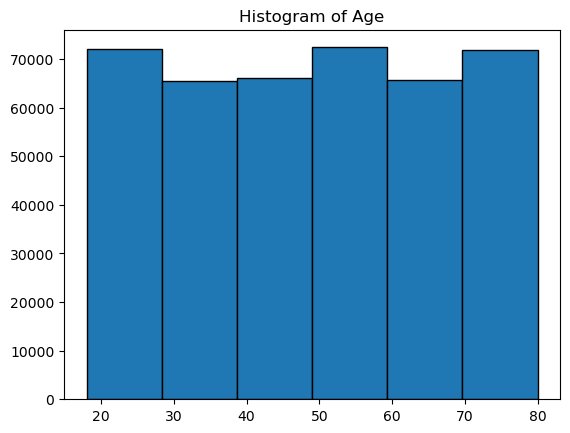

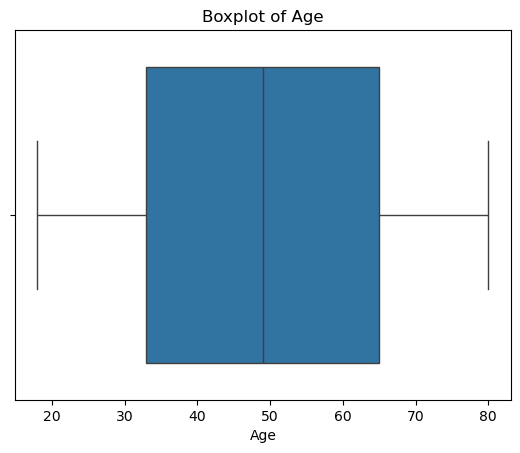

In [7]:
# Histogram
plt.hist(data['Age'], bins=6, edgecolor='black')
plt.title('Histogram of Age')
plt.show()

# Boxplot (outliers)
sns.boxplot(x=data['Age'])
plt.title('Boxplot of Age')
plt.show()

In [8]:
summaryNumChildren = data['Number of Children'].describe()
print(summaryNumChildren)

count    413768.000000
mean          1.298972
std           1.237054
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           4.000000
Name: Number of Children, dtype: float64


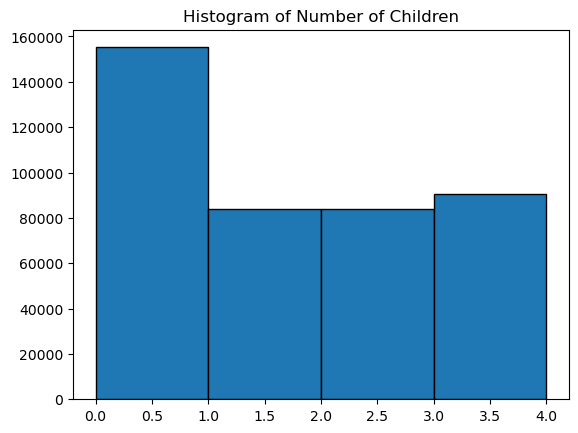

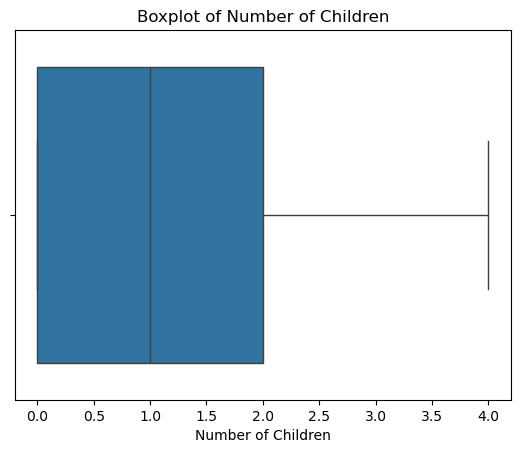

In [9]:
# Histogram
plt.hist(data['Number of Children'], bins=4, edgecolor='black')
plt.title('Histogram of Number of Children')
plt.show()

# Boxplot (outliers)
sns.boxplot(x=data['Number of Children'])
plt.title('Boxplot of Number of Children')
plt.show()

In [10]:
summaryIncome = data['Income'].describe()
print(summaryIncome)

count    413768.000000
mean      50661.707971
std       40624.100565
min           0.410000
25%       21001.030000
50%       37520.135000
75%       76616.300000
max      209995.220000
Name: Income, dtype: float64


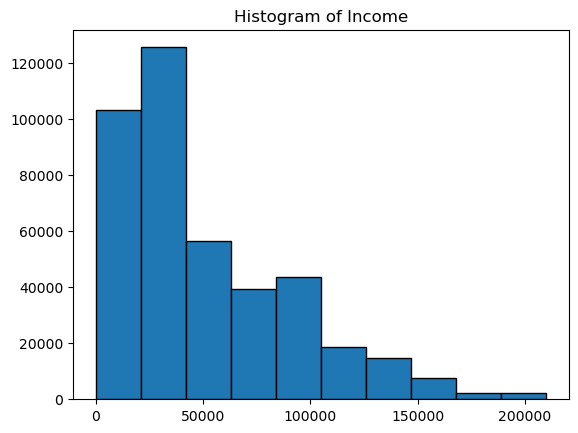

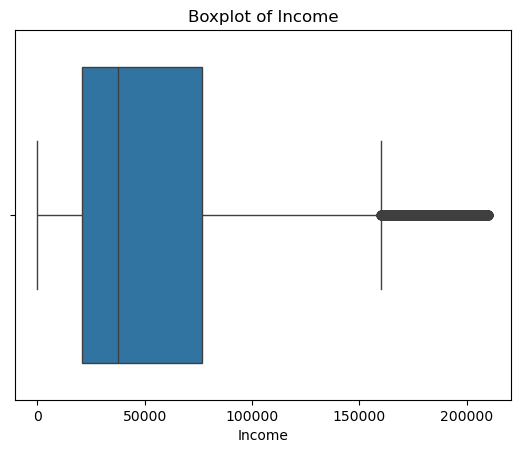

In [11]:
# Histogram
plt.hist(data['Income'], bins=10, edgecolor='black')
plt.title('Histogram of Income')
plt.show()

# Boxplot (outliers)
sns.boxplot(x=data['Income'])
plt.title('Boxplot of Income')
plt.show()

**Investigating and visualizing relationship between categorical features and and depression**

**A) Investigating the breakdown of 'Marital Status' amongst the depressed sample population**

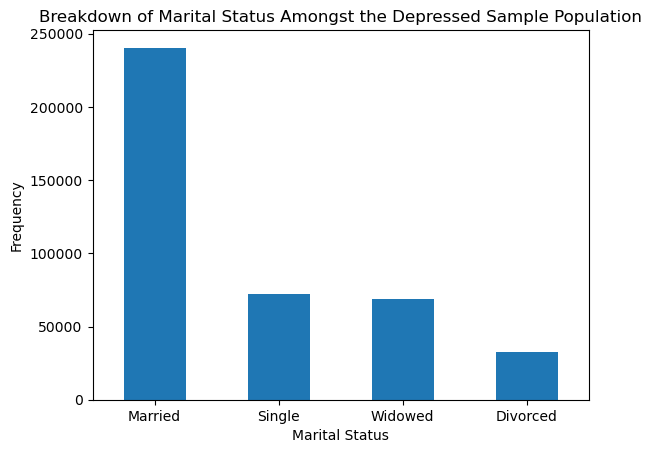

In [14]:
maritalStatusCounts = data['Marital Status'].value_counts()
maritalStatusCounts.plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.title('Breakdown of Marital Status Amongst the Depressed Sample Population')
plt.xticks(rotation=0)
plt.show()

The bar graph clearly shows that most of the depressed individuals are married, this suggests an increased association between being married and being depressed. This sets us up nicely for a linear regression analysis down the line to predict how being married can impact depression.

Interestingly, divorced individuals have the lowest frequency amongst our depressed sample population, this might suggest that perhaps being unburdened by a large stress inducing factor (unhealthy relationships) can be associated with positive mental health. We could further investigate the hypothesis that being unburdened by a large stress inducing factor, be it an unhealthy relationship or not worrying about finances, can lead to better mental health through methods such as k-means clustering

**B) Investigating the relationship between having 'Chronic Medical Conditions' and depression**

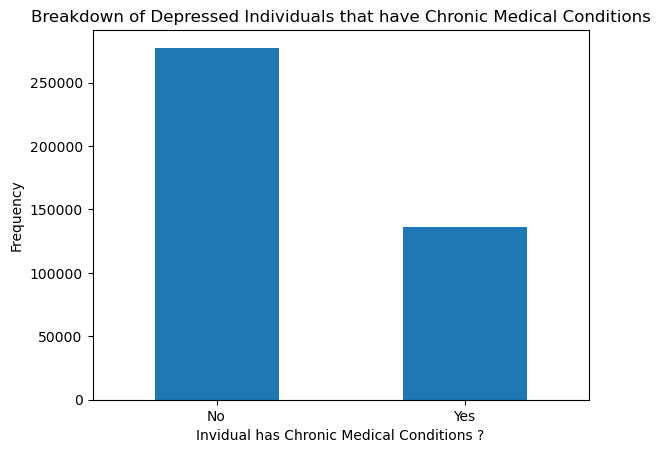

In [18]:
medCount = data['Chronic Medical Conditions'].value_counts()
medCount.plot(kind='bar')
plt.xlabel('Invidual has Chronic Medical Conditions ?')
plt.ylabel('Frequency')
plt.title('Breakdown of Depressed Individuals that have Chronic Medical Conditions')
plt.xticks(rotation=0)
plt.show()

This graph is interesting becuase 'Chronic Medical Conditions' could be causally affected by other lifestlye features in the dataset like 'Smoking Status', 'Physical Activity Level', 'Dietary Habits' and 'Alcohol Consumption', therefore if there was a high frequency of Chronically Ill individuals who are depressed, it could suggest an association between depression and being chronically ill. This graph does not show that, it instead suggests that being chronically ill is not strongly associated with depression, implying that given limited resources and time, investigating the relationship between these lifestlye factors and their effect on health and in turn the potential to reduce probability of developing depression might not yield a significant result.

**Multivariate Analysis :**

**A) Generating a heatmap to investigate correlation between the features**

Data PreProcessing: Encoding all the ordinal categorical variables. 

Mapping and encoding unique education levels:

In [24]:
eduLevels = data["Education Level"].unique()
print(eduLevels)

["Bachelor's Degree" 'High School' "Master's Degree" 'Associate Degree'
 'PhD']


In [25]:
eduMap = {
    'High School': 0,
    'Associate Degree': 1,
    "Bachelor's Degree": 2,
    "Master's Degree": 3,
    'PhD': 4
}
data["Education Level"] = data["Education Level"].map(eduMap)
data.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,2,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,55,Married,0,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,78,Widowed,3,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,58,Divorced,3,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,18,Single,0,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


**Mapping and Encoding Activity Levels:** 

In [27]:
actLevels = data["Physical Activity Level"].unique()
print(actLevels)

['Active' 'Sedentary' 'Moderate']


In [28]:
actMap = {
    'Sedentary': 0,
    'Moderate': 1,
    'Active': 2
}

data["Physical Activity Level"] = data["Physical Activity Level"].map(actMap)
data.head()


,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,2,2,Non-smoker,2,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,55,Married,0,1,Non-smoker,0,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,78,Widowed,3,1,Non-smoker,0,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,58,Divorced,3,3,Non-smoker,1,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,18,Single,0,0,Non-smoker,0,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


**Mapping and Encoding Alcohol Consmuption, Dietary Habits and Sleep Patterns:**

In [30]:
sleepLevels = data["Sleep Patterns"].unique()
alcLevels = data["Alcohol Consumption"].unique()
dietLevels = data["Dietary Habits"].unique()

print(sleepLevels)
print(alcLevels)
print(dietLevels)

['Fair' 'Good' 'Poor']
['Moderate' 'High' 'Low']
['Moderate' 'Unhealthy' 'Healthy']


In [31]:
sleepMap = {
    'Fair': 1,
    'Good': 2,
    'Poor': 0
}

alcMap = {
    'Moderate':1,
    'High':2,
    'Low': 0
}

dietMap = {
    'Moderate':1,
    'Unhealthy': 0,
    'Healthy': 2
}

data['Sleep Patterns'] = data['Sleep Patterns'].map(sleepMap)
data['Alcohol Consumption'] = data['Alcohol Consumption'].map(alcMap)
data['Dietary Habits'] = data['Dietary Habits'].map(dietMap)
data.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,2,2,Non-smoker,2,Unemployed,26265.67,1,1,1,Yes,No,Yes,Yes
1,55,Married,0,1,Non-smoker,0,Employed,42710.36,2,0,1,Yes,No,No,Yes
2,78,Widowed,3,1,Non-smoker,0,Employed,125332.79,0,0,2,No,No,Yes,No
3,58,Divorced,3,3,Non-smoker,1,Unemployed,9992.78,1,1,0,No,No,No,No
4,18,Single,0,0,Non-smoker,0,Unemployed,8595.08,0,1,1,Yes,No,Yes,Yes


**Encoding of smoking status:**

In [33]:
smokingLevels = data['Smoking Status'].unique()
print(smokingLevels)

['Non-smoker' 'Former' 'Current']


In [34]:
smokeMap = {
    'Non-smoker': 2,
    'Former': 1,
    'Current': 0
}
data['Smoking Status'] = data['Smoking Status'].map(smokeMap)
data.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,2,2,2,2,Unemployed,26265.67,1,1,1,Yes,No,Yes,Yes
1,55,Married,0,1,2,0,Employed,42710.36,2,0,1,Yes,No,No,Yes
2,78,Widowed,3,1,2,0,Employed,125332.79,0,0,2,No,No,Yes,No
3,58,Divorced,3,3,2,1,Unemployed,9992.78,1,1,0,No,No,No,No
4,18,Single,0,0,2,0,Unemployed,8595.08,0,1,1,Yes,No,Yes,Yes


In [35]:
yesMap = {
    'Yes': 1,
    'No': 0
}

data['History of Mental Illness'] = data['History of Mental Illness'].map(yesMap)
data['History of Substance Abuse'] = data['History of Substance Abuse'].map(yesMap)
data['Family History of Depression'] = data['Family History of Depression'].map(yesMap)
data['Chronic Medical Conditions'] = data['Chronic Medical Conditions'].map(yesMap)
data.head()


,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,2,2,2,2,Unemployed,26265.67,1,1,1,1,0,1,1
1,55,Married,0,1,2,0,Employed,42710.36,2,0,1,1,0,0,1
2,78,Widowed,3,1,2,0,Employed,125332.79,0,0,2,0,0,1,0
3,58,Divorced,3,3,2,1,Unemployed,9992.78,1,1,0,0,0,0,0
4,18,Single,0,0,2,0,Unemployed,8595.08,0,1,1,1,0,1,1


**Employment Encoding:** 

In [37]:
empLevels = data['Employment Status'].unique()
print(empLevels)

['Unemployed' 'Employed']


In [38]:
empMap = {
    'Unemployed':0,
    'Employed': 1
}

data['Employment Status'] = data['Employment Status'].map(empMap)
data.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,2,2,2,2,0,26265.67,1,1,1,1,0,1,1
1,55,Married,0,1,2,0,1,42710.36,2,0,1,1,0,0,1
2,78,Widowed,3,1,2,0,1,125332.79,0,0,2,0,0,1,0
3,58,Divorced,3,3,2,1,0,9992.78,1,1,0,0,0,0,0
4,18,Single,0,0,2,0,0,8595.08,0,1,1,1,0,1,1


**Correlation Heatmap of all features except marital status (marital status is neither ordinal or binary so it cannot be encoded without imbueing bias):**

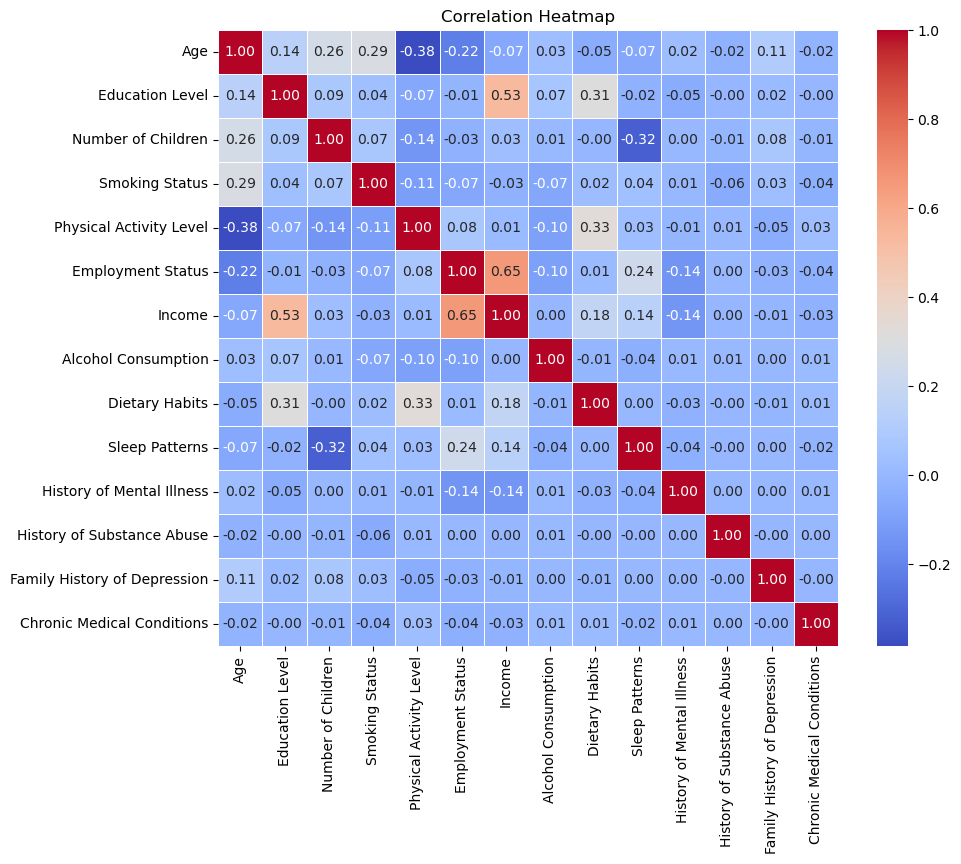

In [40]:
corData = data.drop('Marital Status', axis=1)

corrMat = corData.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corrMat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the heatmap
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap uncovers alot of interesting relationships between the variables. 

As expected, there is a relatively strong positive correlation between Education Level and Income, this suggests that employment status might be a good predictor of income. Digging deeper into the association of income with depression would allow us to explore whether pursuing higher education would reduce the chances of developing depression because it increases the potential income you could earn. 

Another interesting insight you can glean is the relatively strong negative correlation between Number of Children and Sleep patterns, this suggests that an increasing number of children could predict worse sleeping habits, analysing the relationship between bad sleep and depression could answer questions like "Could having more children lead to an increased chance of developing depression"

A relatively strong negative correlation between Age with employment status and Age with Physical Activity Level could suggest that the older you get, there might be an increased chances of developing depression becuase there is a higher chance of being less active and employed. Exploring the relationship between activity level and Income would help us answer this question. 

Investigating the relationship between sleep patterns and number of children

/var/folders/lp/h4vyw06n19j614hx3tp543w40000gn/T/ipykernel_34588/127129273.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="Sleep Patterns", y="Number of Children", palette="coolwarm")


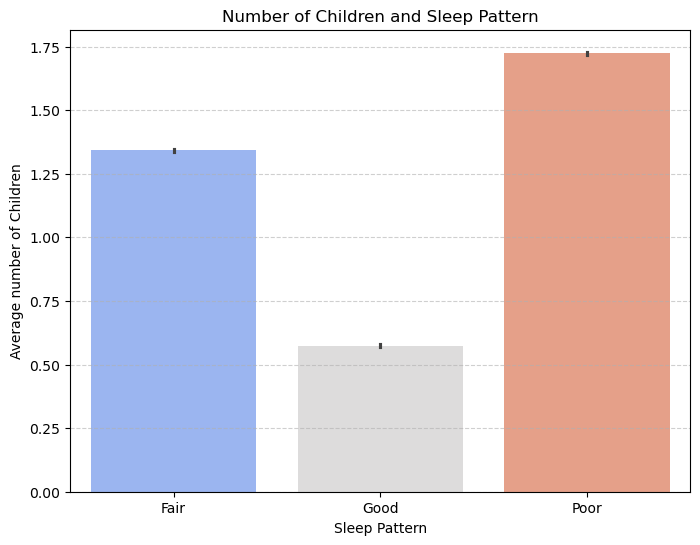

In [43]:
sleep_labels = {0: "Poor", 1: "Fair", 2: "Good"}
data["Sleep Patterns"] = data["Sleep Patterns"].map(sleep_labels)
plt.figure(figsize=(8,6))
sns.barplot(data=data, x="Sleep Patterns", y="Number of Children", palette="coolwarm")
plt.xlabel("Sleep Pattern")
plt.ylabel("Average number of Children")
plt.title("Number of Children and Sleep Pattern")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

The bar graph is to observe the relationship between the pattern of sleep and the number of children. This is to investigate factors that associate with depression which one of them being sleep. We wanted to observe how different variables affect sleep. In this case we decided to use the number of children.

**PROJECT PHASE 2:**

**Linear Regression to predict if pursuing a higher education can result in a higher income**

Split the data into a training set and a test set, 90% for training and 10% for testing purposes:

In [48]:
X = data[["Education Level"]]  
y = data["Income"]  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=83)


print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Training set size: 372391
Test set size: 41377


Training the model on the test set:

In [50]:
model = LinearRegression()


model.fit(X_train, y_train)


print(f"Intercept: {model.intercept_}")
print(f"Coefficient for Education Level: {model.coef_[0]}")


Intercept: 23927.142027667327
Coefficient for Education Level: 17919.681111718557


Predicting Income from test Education level data:

In [52]:

y_pred = model.predict(X_test)


results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(results.head())


           Actual     Predicted
316784   24373.99  59766.504251
191810      46.80  23927.142028
73821   173680.87  95605.866475
246597   59803.11  41846.823139
37752    41894.60  23927.142028


In [53]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 26463.31
Mean Squared Error (MSE): 1194110442.59
Root Mean Squared Error (RMSE): 34555.90
R² Score: 0.2839


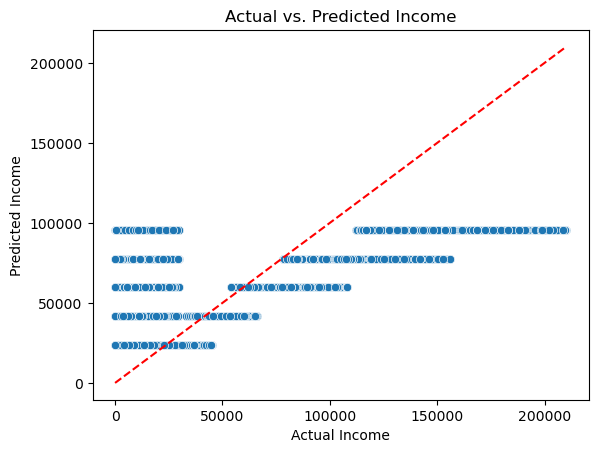

In [54]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Income")
plt.ylabel("Predicted Income")
plt.title("Actual vs. Predicted Income")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")  
plt.show()


**Justification for Choosing Linear Regression:**
We selected Linear Regression for this task to predict whether pursuing a higher education leads to a higher income, as it provides a straightforward method for modeling the relationship between a continuous dependent variable (Income) and an independent variable (Education Level). Linear Regression is commonly used when the goal is to understand how changes in an independent variable affect a dependent variable, and it is particularly effective when there is a linear relationship between the two as the correlation heatmap suggested. 

**Work Done to Train and Tune the Model:**

We started by selecting the relevant features for the model. The independent variable (X) was the Education Level, and the dependent variable (y) was Income.
The data was then split into a training set (90% of the data) and a test set (10% of the data) using train_test_split to ensure that the model is trained on a large portion of the data while still being evaluated on a separate subset.

**Analysis of Results:**
Accuracy of Predictions: The R² score of 0.2839 shows that the model has limited explanatory power.

Error Metrics: The MAE and RMSE values suggest that the model's predictions are somewhat off, with a typical prediction error of around $26,463 (MAE) and $34,556 (RMSE). it highlights that the model is not highly precise, especially when trying to predict exact income values.

While it does capture the overall trend that a higher education level results in higher income, the poor predictive power might be down to the fact that the Independent variable was categorical and was encoded into discrete values. 


**Implementing K Means**

scaling data to be used. 

In [57]:
scaledData = corData.copy()
for col in scaledData.columns:
    avg = scaledData[col].mean()
    sd = scaledData[col].std()
    scaledData[col] = scaledData[col].apply(lambda x: (x - avg)/sd)
scaledData.head()

,Age,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,-0.991296,0.426493,0.566692,0.74607,1.649570,-1.339279,-0.600531,0.121946,0.325876,0.142206,1.512757,-0.672628,1.648986,1.427509
1,0.330380,-1.249419,-0.241681,0.74607,-1.018094,0.746669,-0.195730,1.443793,-1.045647,0.142206,1.512757,-0.672628,-0.606432,1.427509
2,1.596986,1.264450,-0.241681,0.74607,-1.018094,0.746669,1.838098,-1.199900,-1.045647,1.537021,-0.661043,-0.672628,1.648986,-0.700519
3,0.495589,1.264450,1.375064,0.74607,0.315738,-1.339279,-1.001103,0.121946,0.325876,-1.252609,-0.661043,-0.672628,-0.606432,-0.700519
4,-1.707204,-1.249419,-1.050053,0.74607,-1.018094,-1.339279,-1.035509,-1.199900,0.325876,0.142206,1.512757,-0.672628,1.648986,1.427509


**Using Elbow Method to Determine the Optimal Number of Clusters 'k'**

Text(0, 0.5, 'dist')

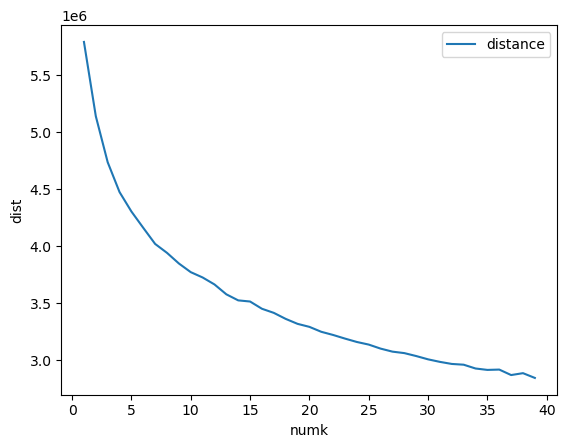

In [59]:
dist = []
for numK in range (1, 40):
    km = KMeans(n_clusters = numK)
    km.fit(scaledData)
    dist.append([numK, km.inertia_])
dist = pd.DataFrame(dist, columns=['numK', 'distance'])

dist.set_index('numK').plot()
plt.xlabel('numk')
plt.ylabel('dist')

**Judging from the graph, the curve flattens when k is ~ 11.**

In [61]:
km = KMeans(n_clusters=11)
scaledData['cluster'] = km.fit_predict(scaledData)

scaledData.head()

,Age,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,cluster
0,-0.991296,0.426493,0.566692,0.74607,1.649570,-1.339279,-0.600531,0.121946,0.325876,0.142206,1.512757,-0.672628,1.648986,1.427509,2
1,0.330380,-1.249419,-0.241681,0.74607,-1.018094,0.746669,-0.195730,1.443793,-1.045647,0.142206,1.512757,-0.672628,-0.606432,1.427509,2
2,1.596986,1.264450,-0.241681,0.74607,-1.018094,0.746669,1.838098,-1.199900,-1.045647,1.537021,-0.661043,-0.672628,1.648986,-0.700519,4
3,0.495589,1.264450,1.375064,0.74607,0.315738,-1.339279,-1.001103,0.121946,0.325876,-1.252609,-0.661043,-0.672628,-0.606432,-0.700519,8
4,-1.707204,-1.249419,-1.050053,0.74607,-1.018094,-1.339279,-1.035509,-1.199900,0.325876,0.142206,1.512757,-0.672628,1.648986,1.427509,2


**Breakdown of clusters and their associated data values**

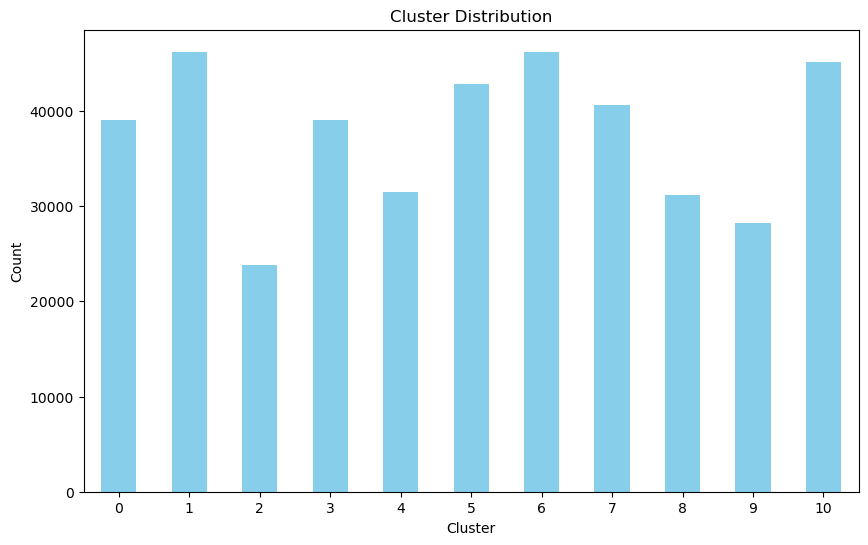

In [63]:
cluster_counts = scaledData['cluster'].value_counts()
plt.figure(figsize=(10, 6))
cluster_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.show()

**Justification for Choosing K-Means:**
We selected the K-Means algorithm for this clustering task due to its simplicity, efficiency, and effectiveness in partitioning data into well-defined groups. As an unsupervised learning model, K-Means allowed us to explore the dataset without predefined labels, helping us identify any underlying patterns, clusters, or similarities within the data.

**Work Done to Tune/Train the Model:**
To prepare the data for clustering, we first scaled the features using z-score normalization. This step was necessary to ensure that all variables contribute equally to the clustering process, as K-Means is sensitive to the scale of the data. Each feature was centered around its mean and scaled by its standard deviation to achieve standardization.

We then used the Elbow Method to determine the optimal number of clusters, k. We iterated through different values of k (from 1 to 39) and calculated the inertia (sum of squared distances from each point to its assigned cluster center). The inertia was plotted against the number of clusters, and the "elbow" in the graph occurred around k=11, where the rate of decrease in inertia slowed significantly. This suggested that k=11 was the most suitable choice for the number of clusters.

**Insights from the Algorithm:**
The K-Means algorithm effectively identified 11 distinct clusters within the data.

**Using K-nn to Predict If an Individual has Chronic Medical Conditions:**

In [66]:
print(data['Chronic Medical Conditions'].value_counts())
corData.head()

Chronic Medical Conditions
0    277561
1    136207
Name: count, dtype: int64


,Age,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,2,2,2,2,0,26265.67,1,1,1,1,0,1,1
1,55,0,1,2,0,1,42710.36,2,0,1,1,0,0,1
2,78,3,1,2,0,1,125332.79,0,0,2,0,0,1,0
3,58,3,3,2,1,0,9992.78,1,1,0,0,0,0,0
4,18,0,0,2,0,0,8595.08,0,1,1,1,0,1,1


In [67]:
knnScaled = scaledData.drop('cluster', axis=1)
knnScaled.head()

,Age,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,-0.991296,0.426493,0.566692,0.74607,1.649570,-1.339279,-0.600531,0.121946,0.325876,0.142206,1.512757,-0.672628,1.648986,1.427509
1,0.330380,-1.249419,-0.241681,0.74607,-1.018094,0.746669,-0.195730,1.443793,-1.045647,0.142206,1.512757,-0.672628,-0.606432,1.427509
2,1.596986,1.264450,-0.241681,0.74607,-1.018094,0.746669,1.838098,-1.199900,-1.045647,1.537021,-0.661043,-0.672628,1.648986,-0.700519
3,0.495589,1.264450,1.375064,0.74607,0.315738,-1.339279,-1.001103,0.121946,0.325876,-1.252609,-0.661043,-0.672628,-0.606432,-0.700519
4,-1.707204,-1.249419,-1.050053,0.74607,-1.018094,-1.339279,-1.035509,-1.199900,0.325876,0.142206,1.512757,-0.672628,1.648986,1.427509


In [68]:
X = knnScaled.drop('Chronic Medical Conditions', axis=1) 
y = corData['Chronic Medical Conditions']   


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=99)
print(y_train.unique())


[0 1]


In [69]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [70]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6080189477245813
Confusion Matrix:
 [[22212  5670]
 [10549  2946]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.80      0.73     27882
           1       0.34      0.22      0.27     13495

    accuracy                           0.61     41377
   macro avg       0.51      0.51      0.50     41377
weighted avg       0.57      0.61      0.58     41377



Justification for Choosing K-Nearest Neighbors (KNN):
We selected K-Nearest Neighbors (KNN) for this binary classification task due to its simplicity, effectiveness in being used as a binary classifier like in our context where invidual either has Chronic Medical Conditions (1) or not (0).

When K=5 the model performs decently well with a 61% accuracy however, The significant class imbalance (2:1) is impacting the model, especially in predicting class 1 (chronic medical conditions). While recall for class 0 is good, recall for class 1 is very low, leading to high false negatives. The low recall and F1-score for class 1 indicate that the model struggles to identify instances of chronic medical conditions.

**Using Cross validation to find a better value for 'K' to improve model perfomance**

Due to PC resource and time constraints, we will try and find the most optimal number of neighbours from 1 to 10

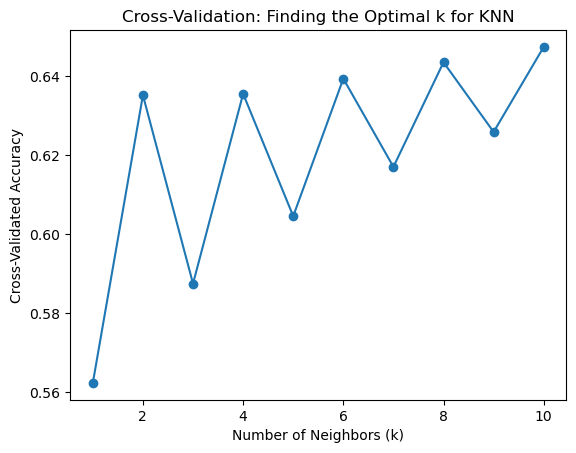

In [73]:
from sklearn.model_selection import cross_val_score

k_range = range(1, 11)  
mean_accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=3, scoring='accuracy', n_jobs=-1)  
    mean_accuracies.append(scores.mean())  

plt.plot(k_range, mean_accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validation: Finding the Optimal k for KNN')
plt.show()



The graph shows that the best accuracy is acheived using K=10. 

**Re Implementation of Knn on K=10**

In [76]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6514488725620514
Confusion Matrix:
 [[25751  2131]
 [12291  1204]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.92      0.78     27882
           1       0.36      0.09      0.14     13495

    accuracy                           0.65     41377
   macro avg       0.52      0.51      0.46     41377
weighted avg       0.57      0.65      0.57     41377



**Work Done to Tune/Train the Model:**
Initially, K=5 was used, but the performance did not meet expectations due to the significant class imbalance. Therefore, cross-validation was employed to find the optimal number of neighbors, with a search range from 1 to 10. The value K=10 was selected as it provided the best accuracy, improving the model's performance relative to K=5. However, the class imbalance remains a challenge, which led to less-than-optimal performance for the minority class (class 1).

**Effectiveness of the Algorithm:**
Precision: The precision for class 0 remained decent at 0.68, which means that when the model predicted class 0, it was correct 68% of the time. However, the precision for class 1 remained low at 0.36, indicating a higher false-positive rate when predicting class 1.

**Recall:** The recall for class 0 was high at 0.92, suggesting that the model successfully identified most of the instances of class 0. However, recall for class 1 dropped significantly to 0.09, indicating that the model struggles to identify class 1 instances, leading to a large number of false negatives.

**F1-Score:** The F1-score for class 1 is 0.14, which is very low, further emphasizing the model's inability to effectively identify instances of class 1 (chronic medical conditions). In contrast, class 0 had a better F1-score of 0.78, which reflects the model's stronger performance on the majority class.

**Accuracy:** The accuracy of 65.1% is an improvement over previous configurations (such as with K=5), but it still falls short due to the imbalanced nature of the dataset. While the model is highly accurate at predicting class 0, its performance on class 1 is poor due to the low recall and F1-score.


**Implementing Logistic to predict if having a higher income was associated with being employed**

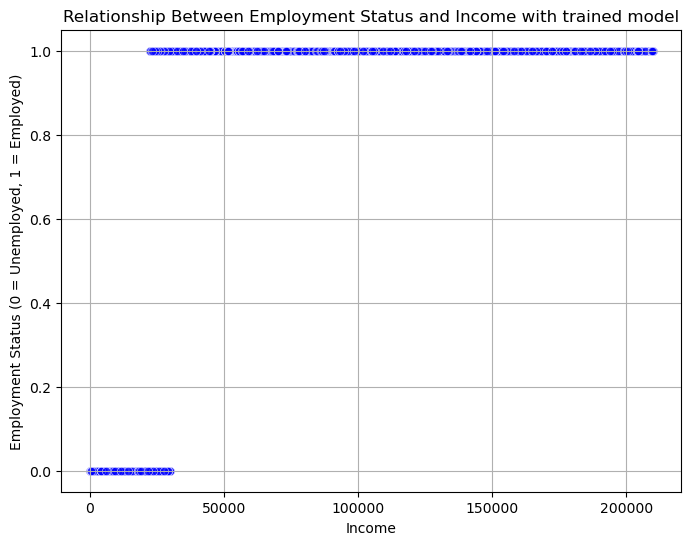

Model Accuracy: 0.93
Confusion Matrix:
[[26629  2887]
 [ 3160 50078]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90     29516
           1       0.95      0.94      0.94     53238

    accuracy                           0.93     82754
   macro avg       0.92      0.92      0.92     82754
weighted avg       0.93      0.93      0.93     82754



In [79]:
X = corData[['Income']].values
Y = corData['Employment Status'].values 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=82)
model = LogisticRegression()  
model.fit(X_train, Y_train)  


plt.figure(figsize=(8,6))
sns.scatterplot(x= X_train.flatten(), y= Y_train, alpha=0.7, color='blue')
plt.xlabel('Income')
plt.ylabel('Employment Status (0 = Unemployed, 1 = Employed)')
plt.title('Relationship Between Employment Status and Income with trained model')
plt.grid(True)
plt.show()

Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(Y_test, Y_pred)
print("Classification Report:")
print(class_report)

**Justificaton for choosing logisitic regression:** Logisitic regression was used because Employment Status was converted to a binary outcome during data cleaning in phase 1 (0 = Unemployed, 1 = Employed) and income is continous making it ideal to predict binary outcome to see if an individual is employeed or not.

**Work Done to Tune/Train the Model:** We started by selecting the relevant features for the model. The independent variable (X) was the Income, and the dependent variable (y) was Employment status. The data was then split into a training set (80% of the data) and a test set (20% of the data) using train_test_split to ensure that the model is trained on a large portion of the data while still being evaluated on a separate subset

**Effectiveness of the Algorithm:** Our model has a 93% accuracy with high precision (Unemployed = 89%, Employed = 95%) and recall (Unemployed = 90%, Employed = 94%) meaning it predicts employment status well with minimal bias. The F1-scores (Unemployed: 90%, Employed: 94%) confirm a strong balance between precision and recall

**Implementing Support Vector Machine Algorithm to predict if an Individual Has a History of Mental Illness**

In [82]:
svmFrame = scaledData.drop('cluster', axis=1)
X = svmFrame.drop('History of Mental Illness', axis=1) 
y = corData['History of Mental Illness'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=109)


In [83]:
# model = LinearSVC()
model = LinearSVC(class_weight="balanced", max_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.75      0.65      0.69    259176
           1       0.38      0.50      0.43    113216

    accuracy                           0.60    372392
   macro avg       0.56      0.57      0.56    372392
weighted avg       0.64      0.60      0.61    372392



**Justification for Choosing Linear SVM:**
We selected the Linear SVM (specifically LinearSVC) for this classification task due to its efficiency and optimization for large datasets, making it suitable for our context where computational and time constraints were key factors. LinearSVC is faster compared to other SVM variants, especially when dealing with high-dimensional data like ours.

**Work Done to Tune/Train the Model:**
To address the class imbalance in our dataset, where class 0 (no history of mental illness) was highly dominant over class 1 (with a history of mental illness), we used the class_weight="balanced" parameter. This automatically adjusts the weights inversely proportional to the class frequencies in the input data, making the algorithm more sensitive to the minority class. Additionally, we set max_iter=5000 to ensure the model converged effectively within the limits imposed by the data size and the number of features.

**Effectiveness of the Algorithm:**
Precision: The model achieved a precision of 0.75 for class 0, which indicates that when it predicted class 0, it was correct 75% of the time. However, the precision for class 1 was very low at 0.38, showing that many of the predicted instances of class 1 were incorrect.

**Recall:** The recall for class 1 (0.50) was higher than precision, meaning the model was able to identify some of the true instances of class 1 but still missed a considerable portion. Class 0 had a recall of 0.65, indicating that it was reasonably good at identifying most of the instances of the dominant class.

**F1-Score:** The F1-score, which is the harmonic mean of precision and recall, was low for both classes, especially for class 1, indicating an overall suboptimal balance between precision and recall. The weighted F1-score of 0.61 suggests the model performed better in identifying class 0 but was still far from ideal.

**Accuracy:** The overall accuracy of 60% isn't great, mainly because of the imbalance in the dataset, where class 1 was underrepresented, and the model had a tendency to favor the majority class.

**Decision Tree Analysis on Dietary Habits based on Education Level and Physical Activity**

/var/folders/lp/h4vyw06n19j614hx3tp543w40000gn/T/ipykernel_34588/2297897035.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance['Importance'], y=importance['column'], palette='coolwarm')


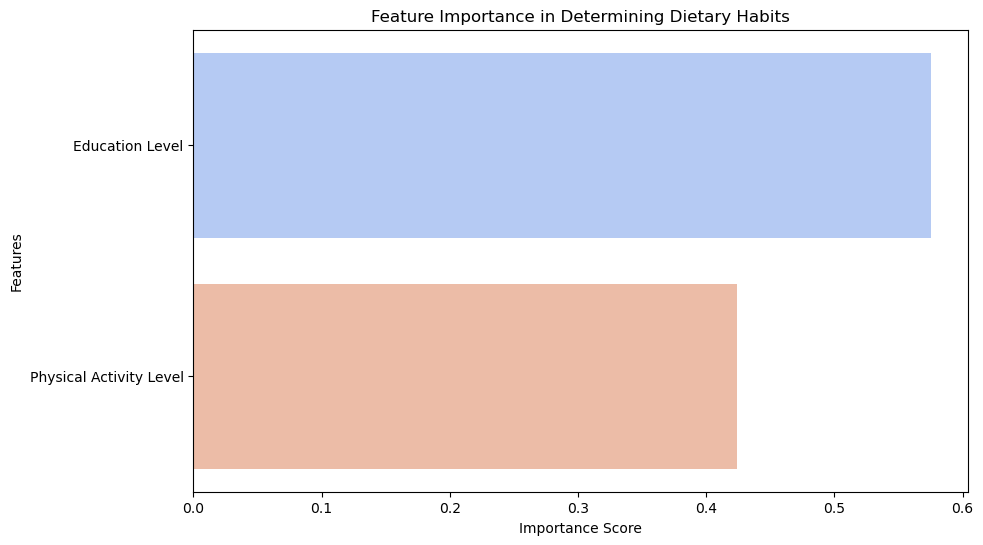

Accuracy: 0.55


In [86]:
columns = ['Education Level', 'Physical Activity Level']
X = corData[columns]
Y = corData['Dietary Habits']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

dtree = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
dtree.fit(X_train, Y_train)

#We decided to not plot the tree because it looks too messy. but feel free to uncomment to 
# plt.figure(figsize=(20,16))
# plot_tree(dtree, feature_names=columns, class_names=['Unhealthy', 'Moderate', 'Healthy'], filled=True, rounded=True)
# plt.title('Decision Tree for Dietary Habits based of Education Level and Physical Activity')
# plt.show()

importance = pd.DataFrame({'column': columns, 'Importance': dtree.feature_importances_})
importance = importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importance['Importance'], y=importance['column'], palette='coolwarm')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Determining Dietary Habits')
plt.show()

Y_pred = dtree.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

**Justificaton for choosing Decision Tree** Decision Tree was used because it would help us classify which factors (Education Level and Physical Activity Level) was most likely to affect Dietary habits. Although the decision tree wasn't rendered due to it being pretty illegible (The code for it is commented out and could be rendered if it need be) we thought it would he helpful to visualize how the decisions were made. Decision trees also able to handle numerical data which was convenient due to all our chosen features being numercial. 

**Source:** https://www.geeksforgeeks.org/decision-tree/

**Work Done to Tune/Train the Model:** The independent variables (X) was Education Level and Physical Activity Levels while the dependent variable (y) was Dietary Habits. The data was then split into a training set (80% of the data) and a test set (20% of the data) using train_test_split to ensure that the model is trained on a large portion of the data while still being evaluated on a separate subset

**Effectiveness of the Algorithm:** Our model had suboptimal performance making our accuracy 55% probably due to the lack of features we used to capture the complexity of dietary habits. The reason for the limited amount of features was because we couldn't find other highly correlated features in the heat map we computed in phase 1.